In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/position_salaries.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [ ]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [ ]:
X=df['Level'].values
y=df['Salary'].values

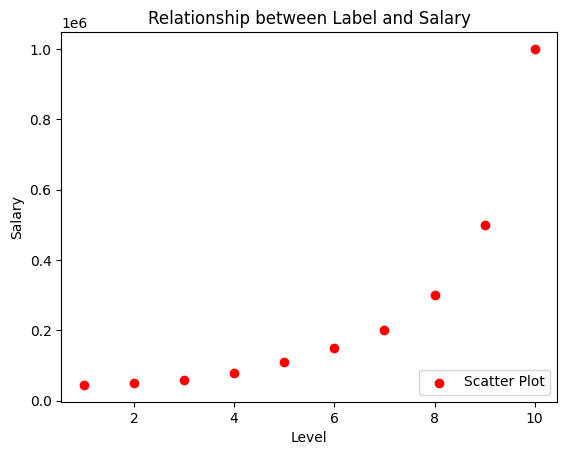

In [ ]:
plt.scatter(X,y,color='red',label='Scatter Plot')
plt.title("Relationship between Label and Salary")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.legend(loc=4)
plt.show()

In [ ]:
print(X.shape)
print(y.shape)

(10,)
(10,)


In [ ]:
X=X.reshape(-1,1)
y=y.reshape(-1,1)
#Printing the dimensions after reshaping
print(X.shape)
print(y.shape)

(10, 1)
(10, 1)


In [ ]:
#Split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

In [ ]:
#print the dimensions of X_train, X_test, y_train, y_test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8, 1)
(8, 1)
(2, 1)
(2, 1)


In [ ]:
#Fit linear model
#Instantiate the linear regression object lm
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

#train the model using training data sets
lm.fit(X_train,y_train)

#predict on the test data
y_pred = lm.predict(X_test)

In [ ]:
#Compute model slope and intercept

a= lm.coef_
b=lm.intercept_
print("Estimated model slope, a:", a)
print("Estimated model intercept, b:", b)

Estimated model slope, a: [[87887.93103448]]
Estimated model intercept, b: [-240258.62068966]


In [ ]:
lm.predict(X)

array([[-152370.68965517],
       [ -64482.75862069],
       [  23405.17241379],
       [ 111293.10344828],
       [ 199181.03448276],
       [ 287068.96551724],
       [ 374956.89655172],
       [ 462844.82758621],
       [ 550732.75862069],
       [ 638620.68965517]])

In [ ]:
#Calculate and print root mean square error (RMSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Square Error: {:.4f}".format(rmse))

Root Mean Square Error: 88544.0987


In [ ]:
#r2 score
from sklearn.metrics import r2_score
print("R2 score: {:.4f}".format(r2_score(y_test, y_pred)))

R2 score: 0.8451


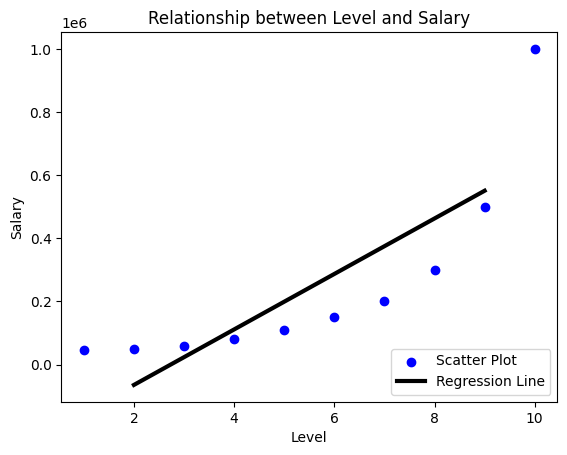

In [ ]:
#plot of refression line

plt.scatter(X,y,color='blue',label = 'Scatter Plot')
plt.plot(X_test,y_pred,color='k',linewidth=3,label='Regression Line')
plt.title('Relationship between Level and Salary')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend(loc=4)
plt.show()

In [ ]:
#check overfitting or underfitting of the data
print("Training set score : {:.4f}".format(lm.score(X_train, y_train)))
print("Test set score : {:.4f}".format(lm.score(X_test, y_test)))

Training set score : 0.6366
Test set score : 0.8451
